In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

In [8]:
# Directory containing the bioclimatic variable files
variable_directory = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/US and other island/'

# Get a list of all variable files in the directory
variable_files = glob.glob(os.path.join(variable_directory, '*.tif'))

# Read the first variable file to get the metadata
dataset = gdal.Open(variable_files[0], gdal.GA_ReadOnly)
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()
rows, cols = dataset.RasterYSize, dataset.RasterXSize

In [9]:
# Initialize the mask as an array of ones
intersection_mask = np.ones((rows, cols), dtype=np.uint8)

# Loop through the remaining variable files
for variable_file in variable_files[1:]:
    # Read the variable file
    dataset = gdal.Open(variable_file, gdal.GA_ReadOnly)
    band = dataset.GetRasterBand(1)

    # Read data as NumPy array
    data = band.ReadAsArray()

    # Update the intersection mask
    intersection_mask = intersection_mask & (data != 0)

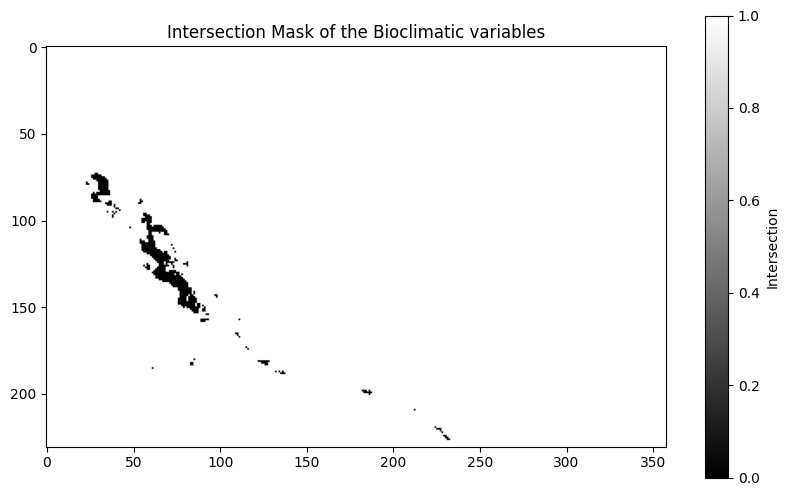

In [10]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the intersection mask
plt.imshow(intersection_mask, cmap='gray')
plt.colorbar(label='Intersection')
plt.title('Intersection Mask of the Bioclimatic variables')

# Display the plot
plt.show()


In [11]:
# Create a new raster file for the intersection mask
driver = gdal.GetDriverByName("GTiff")
output_file = "/content/drive/MyDrive/Project_2/Insect Pest/MaxEnt_Model_Implementation/intersection_mask.tiff"
output_dataset = driver.Create(output_file, cols, rows, 1, gdal.GDT_Byte)

In [7]:
# Set the projection and geotransform
output_dataset.SetProjection(projection)
output_dataset.SetGeoTransform(geotransform)

# Write the intersection mask to the raster file
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(intersection_mask)

# Close the datasets
output_dataset = None
dataset = None

print("Intersection mask created successfully!")


Intersection mask created successfully!
